In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import plotly.graph_objs as go
from yellowbrick.cluster import SilhouetteVisualizer

In [2]:
data_genre = pd.read_csv("/content/drive/MyDrive/Technocolab/data_by_genres.csv")
data_w_genre = pd.read_csv("/content/drive/MyDrive/Technocolab/data_w_genres.csv")

In [3]:
data_genre.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.166667,5,1
1,[],0.679245,0.521473,2.298526e+05,0.401522,0.196737,0.221586,-12.679076,0.112267,112.025168,0.515920,21.682005,7,1
2,a cappella,0.621532,0.577017,1.936522e+05,0.345694,0.003799,0.127087,-12.770211,0.095324,111.813230,0.453186,43.351819,11,1
3,abstract,0.359395,0.459500,3.430185e+05,0.487000,0.791400,0.119480,-14.092000,0.043420,124.743200,0.304990,41.500000,1,1
4,abstract beats,0.353347,0.694400,2.338244e+05,0.613400,0.349403,0.102453,-6.699800,0.143453,119.398400,0.634187,58.600000,10,0


In [59]:
data_genre.columns

Index(['genres', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'key', 'mode'],
      dtype='object')

In [168]:
X = data_genre[['acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity']]

In [128]:
#X=X.to_numpy()

In [169]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

So now here we are going to use PCA and KMeans Clustering to differentiate genres clusters according to audio features.

In [148]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents1 = pca.fit_transform(X)

In [170]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents1 = pca.fit_transform(X)

In [171]:
PCA_dataset1 = pd.DataFrame(data = principalComponents1, columns = ['component1', 'component2', 'component3'] )
PCA_dataset1.head()

,component1,component2,component3
0,1.899793,-1.825107,-0.327283
1,1.319377,1.003931,0.554390
2,0.761243,0.765673,-0.776423
3,1.488441,-1.649090,-0.724694
4,-1.194165,0.456852,-1.050065


In [172]:
pc1 = PCA_dataset1['component1']
pc2 = PCA_dataset1['component2']
pc3 = PCA_dataset1['component3']

In [173]:
X.shape

(2664, 10)

In [174]:
y = data_genre[['genres']]

Now we use Elbow method to decide the value of K in KMeans Clustering.

Text(0, 0.5, 'Inertia')

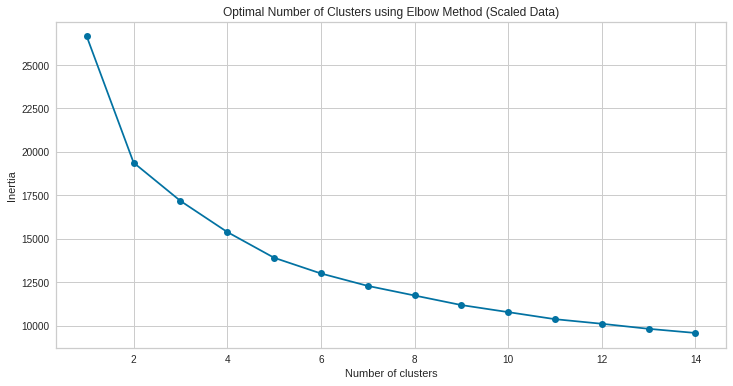

In [178]:
sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append([k, km.inertia_])
    
oca_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [202]:
km = KMeans(n_clusters=2, random_state=42)

In [203]:
y_km = km.fit_predict(X)
#
# Calculate Silhoutte Score
#
score = silhouette_score(X, km.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.322


Silhouette Score we are getting as 0.322.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



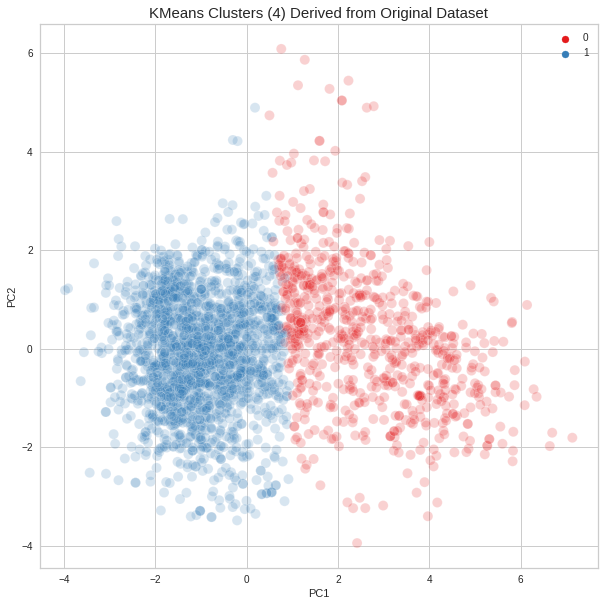

In [204]:
pca2 = PCA(n_components=3).fit(X)
pca2d = pca2.transform(X)
plt.figure(figsize = (10,10))
sns.scatterplot(pca2d[:,0], pca2d[:,1], 
                hue=km.labels_, 
                palette='Set1',
                s=100, alpha=0.2).set_title('KMeans Clusters (4) Derived from Original Dataset', fontsize=15)
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()